In [1]:
import numpy as np

In [2]:
X = 2*np.random.rand(100,1)

In [3]:
y = 4 + 3*X + np.random.randn(100,1)

In [4]:
X_b = np.c_[np.ones((100,1)),X]

## Linear Regression

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.24213304],
       [2.87384882]])

In [7]:
X_new = np.array([[0],[2]])

In [8]:
X_new_b = np.c_[np.ones((2,1)),X_new]

In [9]:
y_predict = X_new_b.dot(theta_best)

In [10]:
y_predict

array([[4.24213304],
       [9.98983067]])

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

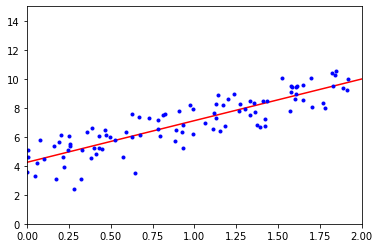

In [12]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lin_reg = LinearRegression()

In [15]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lin_reg.intercept_,lin_reg.coef_

(array([4.24213304]), array([[2.87384882]]))

In [17]:
lin_reg.predict(X_new)

array([[4.24213304],
       [9.98983067]])

## Batch Greadient Descent

In [18]:
eta = 0.1

In [19]:
n_iterations = 1000

In [20]:
m = 100

In [21]:
theta = np.random.randn(2,1)

In [22]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [23]:
theta

array([[4.24213304],
       [2.87384882]])

## Stochastic Greadient Descent

In [24]:
n_epochs = 50

In [25]:
t0 , t1 = 5,50

In [26]:
def learning_schedule(t):
    return t0/(t+t1)

In [27]:
theta = np.random.randn(2,1)

In [28]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * gradients

In [29]:
theta

array([[4.17164165],
       [2.91515056]])

In [30]:
from sklearn.linear_model import SGDRegressor

In [31]:
sgd_reg = SGDRegressor(max_iter=50,penalty=None,eta0=0.1)

In [32]:
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [33]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.15042865]), array([2.79666858]))

## Polynomial Regression

In [34]:
m = 1000
X = 6*np.random.rand(m,1) - 3
y = 0.5 * X**2 + X +2 + np.random.randn(m,1)

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)

In [37]:
X_poly = poly_features.fit_transform(X)

In [38]:
X[0]

array([2.71624671])

In [39]:
X_poly[0]

array([2.71624671, 7.37799622])

In [40]:
lin_reg = LinearRegression()

In [41]:
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lin_reg.intercept_,lin_reg.coef_

(array([2.08307993]), array([[1.00958971, 0.48086103]]))

## Learning Curves

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
def plot_learning_curves(model, X , y):
    X_train , X_val , y_train , y_val = train_test_split(X,y,test_size=0.2)
    train_errors,val_erros = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_erros.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_erros),"b-",linewidth=3,label="val")

In [46]:
lin_reg = LinearRegression()

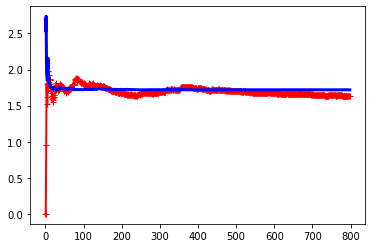

In [47]:
plot_learning_curves(lin_reg,X,y)

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
polynomial_regression = Pipeline((
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),
))

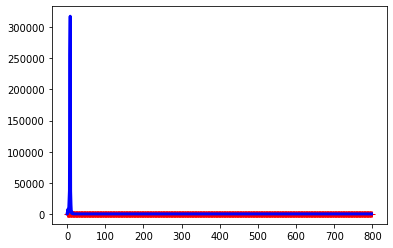

In [50]:
plot_learning_curves(polynomial_regression,X,y)

## Ridge Regression

In [51]:
from sklearn.linear_model import Ridge

In [52]:
ridge_reg = Ridge(alpha=1,solver="cholesky")

In [53]:
ridge_reg.fit(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [54]:
ridge_reg.predict([[1.5]])

array([[4.99828579]])

In [55]:
sgd_reg = SGDRegressor(penalty="l2")

In [56]:
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [57]:
sgd_reg.predict([[1.5]])

array([5.03907967])

## Lasso Regression

In [58]:
from sklearn.linear_model import Lasso

In [59]:
lasso_reg = Lasso(alpha=0.1)

In [60]:
lasso_reg.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
lasso_reg.predict([[1.5]])

array([4.94889186])

## Elastic Net

In [62]:
from sklearn.linear_model import ElasticNet

In [63]:
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)

In [64]:
elastic_net.fit(X,y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
elastic_net.predict([[1.5]])

array([4.94915103])

## Early Stopping

In [66]:
from sklearn.base import clone

In [67]:
sgd_reg = SGDRegressor(max_iter=1,warm_start=True,penalty=None,learning_rate="constant",eta0=0.0005)

In [68]:
min_val_error = float("inf")

In [69]:
best_epoch = None
best_model = None

In [70]:
X_train, y_train , X_val , y_val = train_test_split(X,y,test_size=0.5)

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
poly_scaled = Pipeline([
("poly_feature",PolynomialFeatures(degree=10,include_bias=False)),
("scaling",StandardScaler()),])

In [73]:
X_train_poly_scaled = poly_scaled.fit_transform(X_train)

In [74]:
X_val_poly_scaled = poly_scaled.fit_transform(X_val)

In [75]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict,y_val)
    if(val_error < min_val_error):
        min_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  Convergenc

C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  Convergenc

C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  Convergenc

C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jnrah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

In [76]:
best_epoch,best_model

(0,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=True))